In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [122]:
df=pd.read_csv('Fraud.csv')
df.shape

(6362620, 11)

In [80]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [81]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [83]:
#checking for missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [123]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

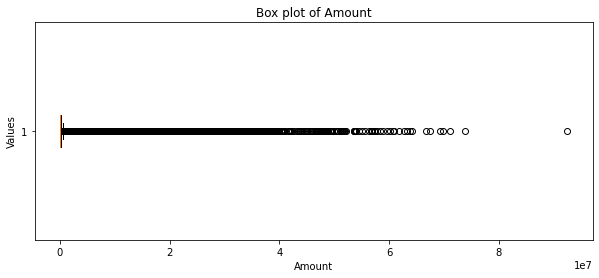

In [124]:
#checking for outliers
plt.figure(figsize=(10,4))
plt.boxplot(df['amount'],vert=False)

#set labels and title
plt.xlabel('Amount')
plt.ylabel('Values')
plt.title('Box plot of Amount')

plt.show()

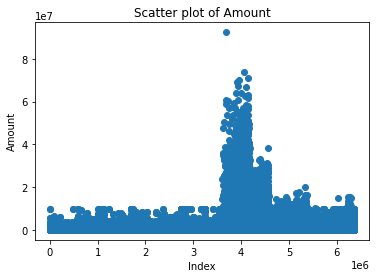

In [125]:
plt.scatter(df.index,df['amount'])

plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter plot of Amount')

plt.show()

In [87]:
#find outlier using IQR method

Q1=df['amount'].quantile(0.25)
Q3=df['amount'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3-1.5*IQR

outliers=df[(df['amount']<lower_bound) | (df['amount']>upper_bound)]

print('outliers:')
print(outliers)

outliers:
         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72

In [88]:
outliers.shape

(6362620, 11)

In [89]:
print(len(outliers[outliers.isFraud==1]))

8213


In [90]:
legit=len(df[df.isFraud==0])
fraud=len(df[df.isFraud==1])
legit_percent=(legit/(fraud+legit))*100
fraud_percent=(fraud/(fraud+legit))*100

print('No. of legit trasactions: ',legit)
print('No. of fraud trasactions: ',fraud)
print('percentage of legit trasactions: {:.4f}%'.format(legit_percent))
print('percentage of fraud trasactions: {:.4f}%'.format(fraud_percent))

No. of legit trasactions:  6354407
No. of fraud trasactions:  8213
percentage of legit trasactions: 99.8709%
percentage of fraud trasactions: 0.1291%


clearly this is an highly imbalanced dataset.Removing outlier make the model biased.

([<matplotlib.patches.Wedge at 0x1e483e96520>,
 [Text(-1.099990955625572, 0.004460666087110192, ''),
  Text(1.0999909559371663, -0.004460589247970448, '')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.8709%'),
  Text(0.599995066874818, -0.002433048680711153, '0.1291%')])

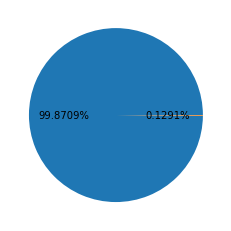

In [91]:
plt.pie(df['isFraud'].value_counts(),autopct='%.4f%%')

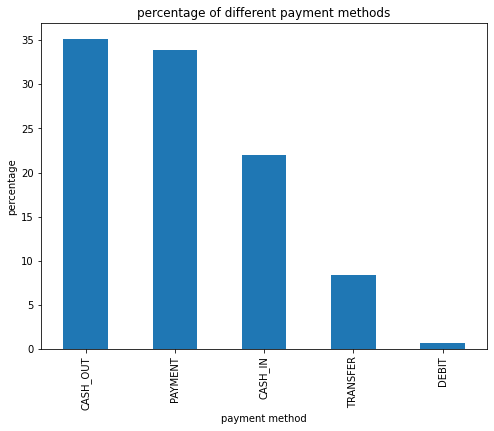

In [92]:
payment_counts=df['type'].value_counts()
payment_percentage=(payment_counts/payment_counts.sum())*100

plt.figure(figsize=(8,6))
payment_percentage.plot(kind='bar')

plt.xlabel('payment method')
plt.ylabel('percentage')
plt.title('percentage of different payment methods')

plt.show()

CASH_OUT    50.11567
TRANSFER    49.88433
Name: type, dtype: float64


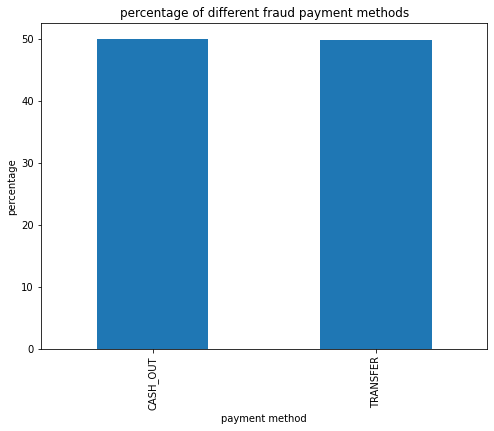

In [93]:
fraud_df=df[df['isFraud']==1]
legit_df=df[df['isFraud']==0]

payment_counts_fraud=fraud_df['type'].value_counts()
payement_percentages_fraud=(payment_counts_fraud/payment_counts_fraud.sum())*100

print(payement_percentages_fraud)
plt.figure(figsize=(8,6))
payement_percentages_fraud.plot(kind='bar')

plt.xlabel('payment method')
plt.ylabel('percentage')
plt.title('percentage of different fraud payment methods')

plt.show()

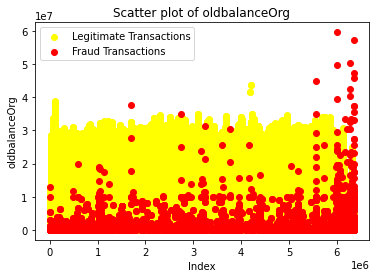

In [94]:
plt.scatter(legit_df.index,legit_df['oldbalanceOrg'],color='yellow',label='Legitimate Transactions')
plt.scatter(fraud_df.index,fraud_df['oldbalanceOrg'],color='red',label='Fraud Transactions')

plt.xlabel('Index')
plt.ylabel('oldbalanceOrg')
plt.title('Scatter plot of oldbalanceOrg')

plt.legend()

plt.show()

In [95]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [96]:
objList=new_df.select_dtypes(include='object').columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [97]:
#Label encoding for object datatypes for numeric conversions
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for i in objList:
    new_df[i]=label_encoder.fit_transform(new_df[i].astype(str))

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


<AxesSubplot:>

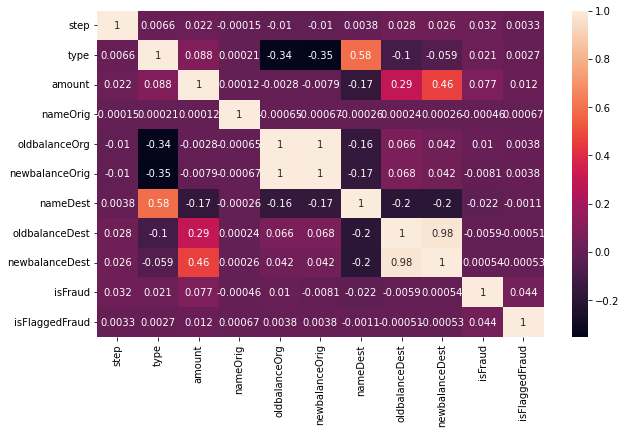

In [98]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [99]:
#calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    return(vif)
calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [100]:
new_df['Amount_Orig']=new_df.apply(lambda x: x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
new_df['Amount_Dest']=new_df.apply(lambda x: x['newbalanceDest']-x['oldbalanceDest'],axis=1)

new_df=new_df.drop(['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest',"nameOrig",'nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,step,2.089916
1,type,2.039328
2,amount,3.883383
3,isFraud,1.187909
4,isFlaggedFraud,1.002535
5,Amount_Orig,1.293306
6,Amount_Dest,3.774030


<AxesSubplot:>

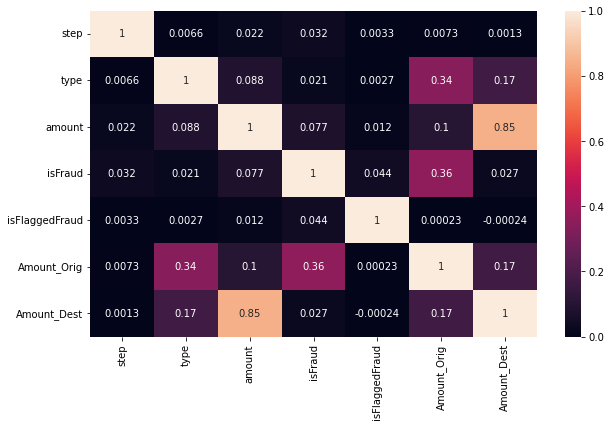

In [101]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [102]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,Amount_Orig,Amount_Dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,-21182.0
4,1,3,11668.14,0,0,11668.14,0.0


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [104]:
#perform scaling
scaler=StandardScaler()
new_df['Normalized_Amount']=scaler.fit_transform(new_df['amount'].values.reshape(-1,1))
new_df['Normalized_step']=scaler.fit_transform(new_df['step'].values.reshape(-1,1))
new_df['Normalized_type']=scaler.fit_transform(new_df['type'].values.reshape(-1,1))
new_df['Normalized_Account_orig']=scaler.fit_transform(new_df['Amount_Orig'].values.reshape(-1,1))
new_df['Normalized_Account_Dest']=scaler.fit_transform(new_df['Amount_Dest'].values.reshape(-1,1))
new_df.drop(['amount','step','type','Amount_Orig','Amount_Dest'],inplace=True,axis=1)

new_df.head()

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized_type,Normalized_Account_orig,Normalized_Account_Dest
0,0,0,-0.281560,-1.703042,0.952399,0.211876,-0.152896
1,0,0,-0.294767,-1.703042,0.952399,0.157490,-0.152896
2,1,0,-0.297555,-1.703042,1.693076,0.146011,-0.152896
3,1,0,-0.297555,-1.703042,-0.528954,0.146011,-0.178952
4,0,0,-0.278532,-1.703042,0.952399,0.224345,-0.152896


In [106]:
y=new_df['isFraud']
X=new_df.drop(['isFraud'],axis=1)

(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=22)

print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (5090096, 6)
Shape of X_test (1272524, 6)


In [109]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg=LogisticRegression(C=0.001,penalty="l2")
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
logistic_regression_score=log_reg.score(X_test,y_test)*100

In [110]:
#decision tree

decision_tree=DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(X_train,y_train)

y_pred_dt=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test,y_test)*100

In [111]:
#random forest

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
y_pred_rf=random_forest.predict(X_test)
random_forest_score=random_forest.score(X_test,y_test)*100

In [112]:
print('Random forest score',random_forest_score)
print('Decision Tree score',decision_tree_score)
print('Logistic Regression score',logistic_regression_score)

Random forest score 99.96361561746576
Decision Tree score 99.94609139002486
Logistic Regression score 99.91230027881596


Classification report- Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.74      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion matrix- Random Forest


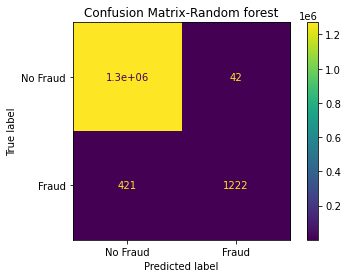

In [113]:
#classification_report_rf
classification_report_rf=classification_report(y_test,y_pred_rf)
print('Classification report- Random Forest')
print(classification_report_rf)

confusion_matrix_rf=confusion_matrix(y_test,y_pred_rf.round())
print('Confusion matrix- Random Forest')
display_labels=['No Fraud','Fraud']
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix-Random forest')
plt.show()

precision_random_forest=precision_score(y_test,y_pred_rf)
recall_random_forest=recall_score(y_test,y_pred_rf)

Classification report- Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.80      0.77      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.90      0.89      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion matrix- Decision tress


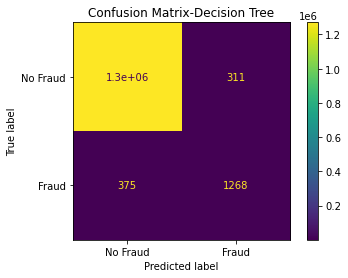

In [114]:
#classification_report_dt
classification_report_dt=classification_report(y_test,y_pred_dt)
print('Classification report- Random Forest')
print(classification_report_dt)

confusion_matrix_dt=confusion_matrix(y_test,y_pred_dt.round())
print('Confusion matrix- Decision tress')
display_labels=['No Fraud','Fraud']
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix-Decision Tree')
plt.show()

precision_decision_tree=precision_score(y_test,y_pred_dt)
recall_decision_tree=recall_score(y_test,y_pred_dt)

Classification report- logistic regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.37      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion matrix- Logistic regression


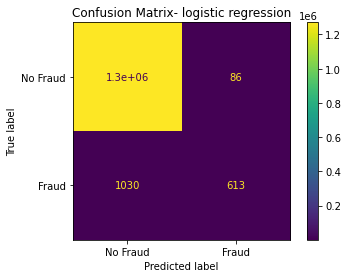

In [117]:
#classification_report_lr
classification_report_lr=classification_report(y_test,y_pred)
print('Classification report- logistic regression')
print(classification_report_lr)

confusion_matrix_lr=confusion_matrix(y_test,y_pred.round())
print('Confusion matrix- Logistic regression')
display_labels=['No Fraud','Fraud']
matrix=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix- logistic regression')
plt.show()

precision_logistic_regression=precision_score(y_test,y_pred)
recall_logistic_regressio=recall_score(y_test,y_pred)

In [119]:
algorithms=['Random Forest','Decision Tree','Logistic Regression']
accuracy_scores=[random_forest_score,decision_tree_score,logistic_regression_score]
precision_scores=[precision_random_forest,precision_decision_tree,precision_logistic_regression]
recall_scores=[recall_random_forest,recall_decision_tree,recall_logistic_regressio]
data={
    'Algorithm':algorithms,
    'Accuracy':accuracy_scores,
    'Precision':precision_scores,
    'Recall':recall_scores
}

In [120]:
comparison=pd.DataFrame(data)
print(comparison)

             Algorithm   Accuracy  Precision    Recall
0        Random Forest  99.963616   0.966772  0.743761
1        Decision Tree  99.946091   0.803040  0.771759
2  Logistic Regression  99.912300   0.876967  0.373098
